In [1]:
# Cora Ferguson
# This code is designed to graph the relationship between the time and the temperature for the peltier trial on 
# 10/24/2022 with the thermistor. This trial ran for 30 mins and the goal was to test the efficacy of the thermistor 
# moderated system over a longer time period

# import the modules required for graphing
import pandas as pd
import numpy as np
import sympy as sp
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt 
    #allows you to create graphs
from scipy.optimize import curve_fit 
    #importing specific command for curvefitting
%matplotlib notebook   
    #allows you to interact with the plot

In [2]:
# Inputting data in a spreadsheet
g = pd.DataFrame({('Time'):[0,3,6,9,12,15,18,21,24,27,30],
                  ('Temperature'): [37,36,37,38,39,38,37,37,37,39,40],
                  ('Thermistor'):[138,133,137,149,162,145,135,133,139,143,148]})
g

,Time,Temperature,Thermistor
0,0,37,138
1,3,36,133
2,6,37,137
3,9,38,149
4,12,39,162
5,15,38,145
6,18,37,135
7,21,37,133
8,24,37,139
9,27,39,143


<IPython.core.display.Javascript object>


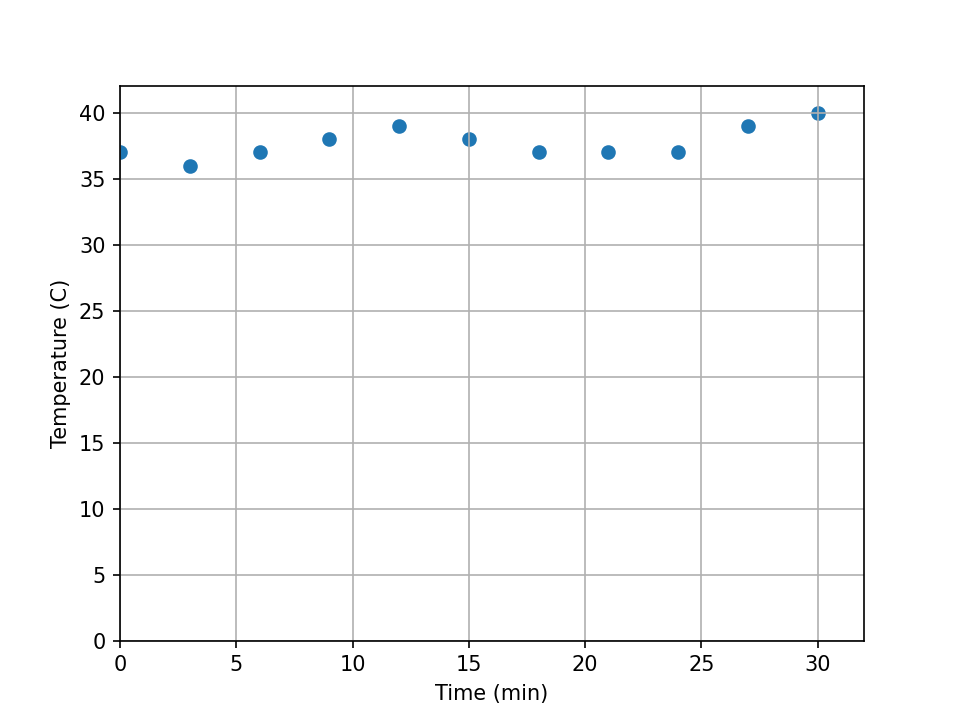

Text(0, 0.5, 'Temperature (C)')

In [3]:
# Make a scatterplot of the Time vs temperature data

plt.figure()
plt.grid(True)
#will give you a scatterplot
plt.scatter(g.Time, g.Temperature)
#Defining the bounds of the plot
plt.axis([0, 32, 0, 42])
plt.xlabel("Time (min)")
plt.ylabel("Temperature (C)")

<IPython.core.display.Javascript object>


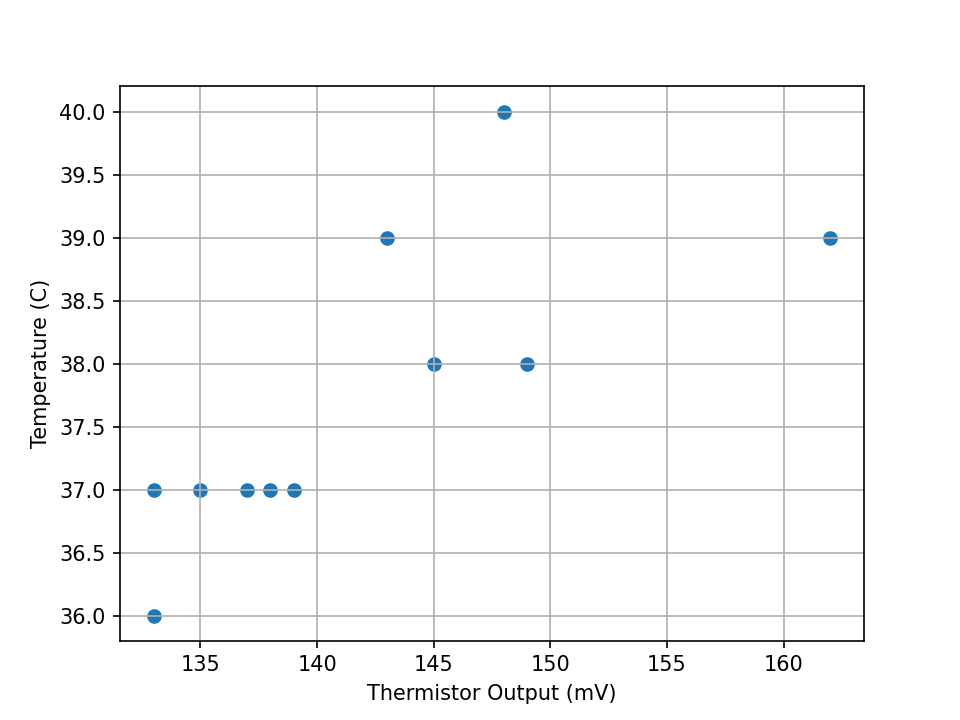

Text(0, 0.5, 'Temperature (C)')

In [4]:
# Make a scatterplot of the Thermistor Output vs temperature data
# the way I have it set up, the Arduino is outputting the voltage difference across the voltage divider.  Since the 
# resistance of the thermistor changes with the heat that it is exposed to, the voltage also changes as temperature changes

plt.figure()
plt.grid(True)
    #will give you a scatterplot
plt.scatter(g.Thermistor, g.Temperature)
#plt.axis([0, 32, 0, 42])
plt.xlabel("Thermistor Output (mV)")
plt.ylabel("Temperature (C)")

<IPython.core.display.Javascript object>


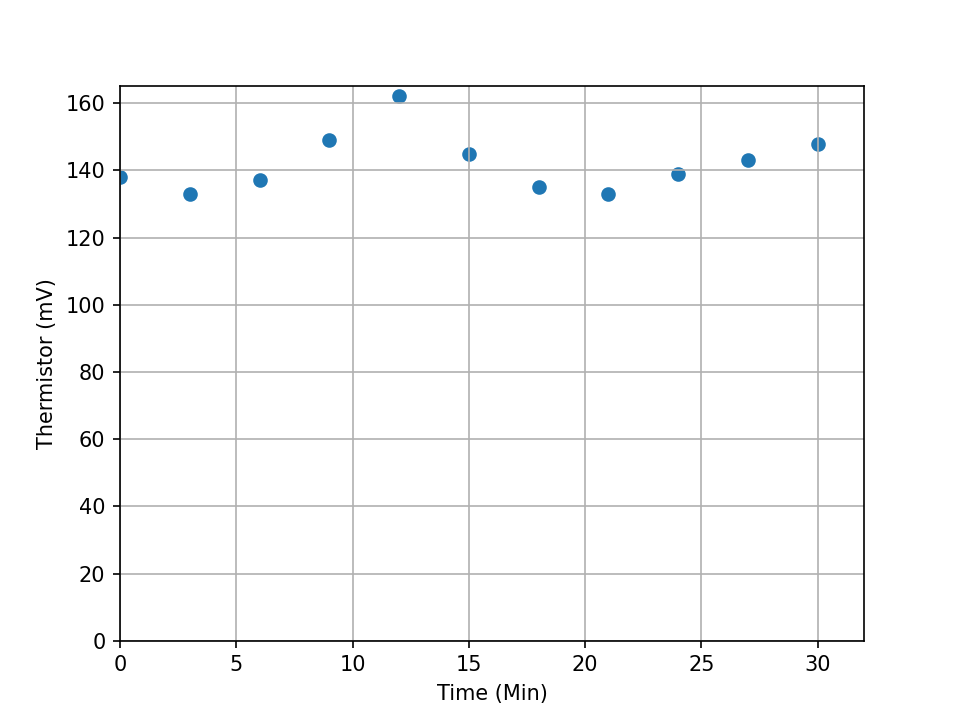

Text(0, 0.5, 'Thermistor (mV)')

In [5]:
# Make a scatterplot of the Time vs Thermistor Output data

plt.figure()
plt.grid(True)
    #will give you a scatterplot
plt.scatter(g.Time, g.Thermistor)
plt.axis([0, 32, 0, 165])
plt.xlabel("Time (Min)")
plt.ylabel("Thermistor (mV)")

In [6]:
# Inputting the short term data in a spreadsheet
h = pd.DataFrame({('Time'):[0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99],
                  ('Temperature'): [38,38,37,36,37,38,37,37,36,37,40,38,39,37,38,38,39,38,38,36,39,37,38,36,38,37,39,37,40,37,38,36,39,40]})
h


,Time,Temperature
0,0,38
1,3,38
2,6,37
3,9,36
4,12,37
5,15,38
6,18,37
7,21,37
8,24,36
9,27,37


<IPython.core.display.Javascript object>


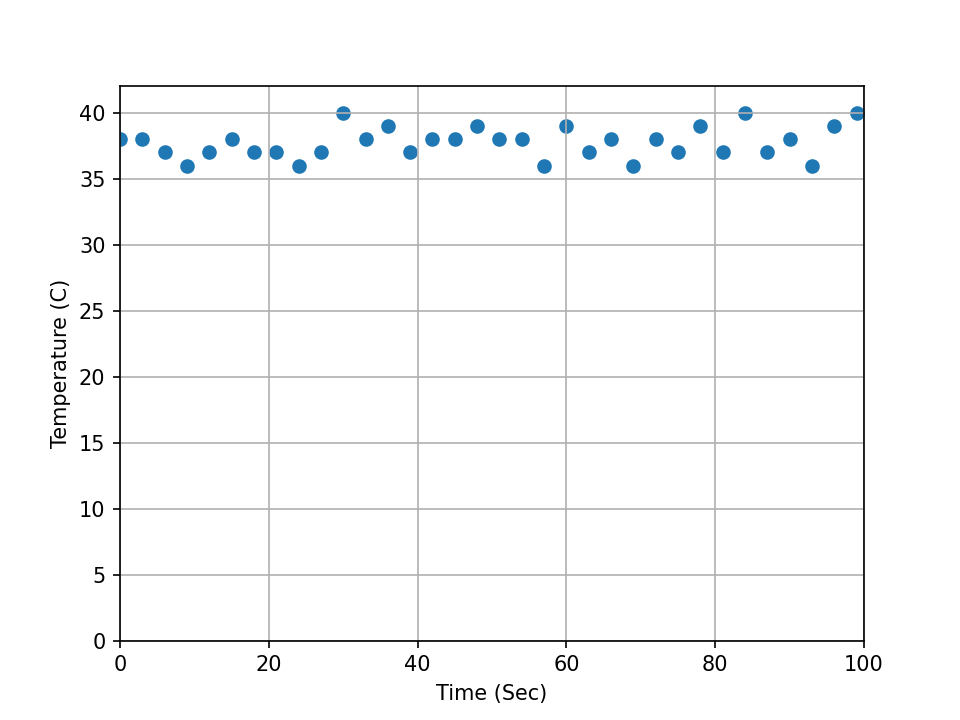

Text(0, 0.5, 'Temperature (C)')

In [7]:
# Make a scatterplot of the Time vs Temperature Output data Short term rapid Trial 1

plt.figure()
plt.grid(True)
    #will give you a scatterplot
plt.scatter(h.Time, h.Temperature)
plt.axis([0, 100, 0, 42])
plt.xlabel("Time (Sec)")
plt.ylabel("Temperature (C)")

In [8]:
# Inputting trial 2, long term data in a spreadsheet
l = pd.DataFrame({('Time'):[0,3,6,9,12,15,18,21,24,27,30],
                  ('Temperature'): [36, 35, 37, 36, 36, 37 ,37, 38, 37, 37, 37],
                  ('Thermistor'):[133, 128, 138, 132, 132, 145, 137, 146, 134, 132, 136]})
l

,Time,Temperature,Thermistor
0,0,36,133
1,3,35,128
2,6,37,138
3,9,36,132
4,12,36,132
5,15,37,145
6,18,37,137
7,21,38,146
8,24,37,134
9,27,37,132


<IPython.core.display.Javascript object>


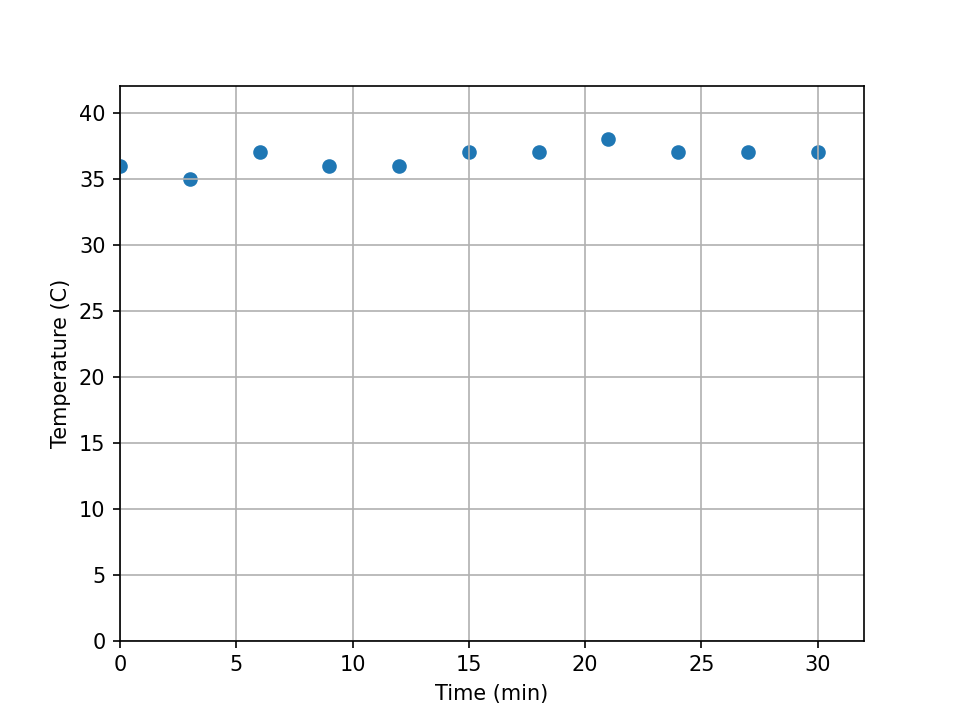

Text(0, 0.5, 'Temperature (C)')

In [9]:
plt.figure()
plt.grid(True)
#will give you a scatterplot
plt.scatter(l.Time, l.Temperature)
#Defining the bounds of the plot
plt.axis([0, 32, 0, 42])
plt.xlabel("Time (min)")
plt.ylabel("Temperature (C)")

In [10]:
# Inputting the short term data in a spreadsheet
m = pd.DataFrame({('Time'):[0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99],
                  ('Temperature'): [37,37,37,38,36,35,36,37,36,35,36,37,35,37,35,36,36,37,36,37,35,37,38,36,37,36,37,38,36,38,36,38,37,37]})
m

,Time,Temperature
0,0,37
1,3,37
2,6,37
3,9,38
4,12,36
5,15,35
6,18,36
7,21,37
8,24,36
9,27,35


<IPython.core.display.Javascript object>


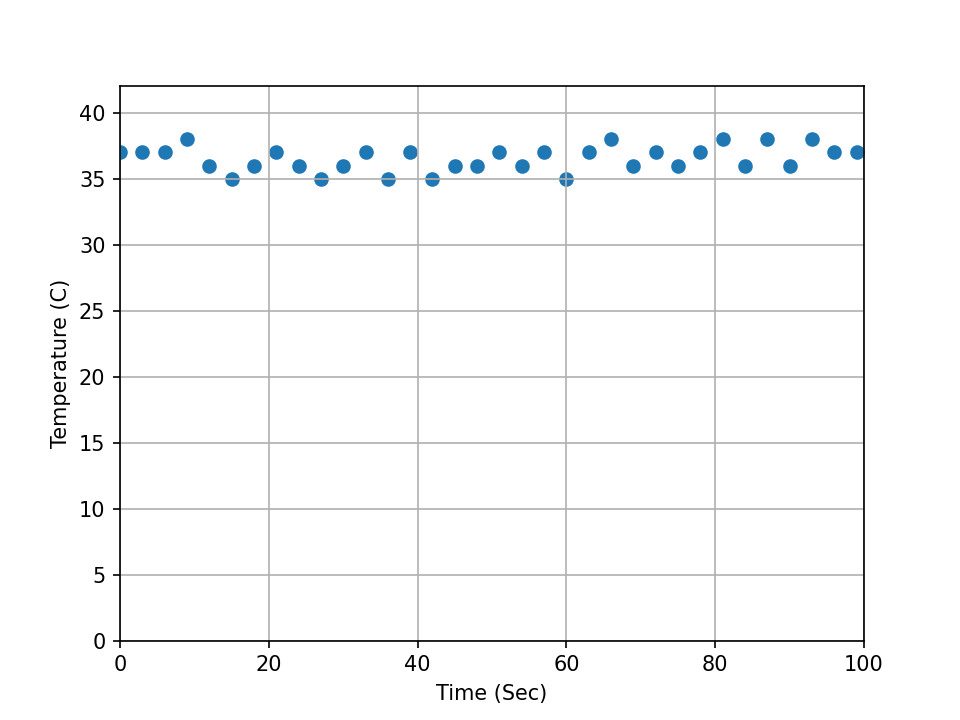

Text(0, 0.5, 'Temperature (C)')

In [11]:
# Make a scatterplot of the Time vs Temperature Output data Short term rapid Trial 1

plt.figure()
plt.grid(True)
    #will give you a scatterplot
plt.scatter(m.Time, m.Temperature)
plt.axis([0, 100, 0, 42])
plt.xlabel("Time (Sec)")
plt.ylabel("Temperature (C)")

In [12]:
# input the data for the first magnetic field trial into a spreadsheet:
# Inputting trial 2, long term data in a spreadsheet
o = pd.DataFrame({('Time'):[0,3,6,9,12,15,18,21,24,27,30],
                  ('Temperature'): [36,38,39,38,38,37,37,37,38,38,38],
                  ('Thermistor'):[130,139,141,139,144,135,133,132,145,141,140]})
o

,Time,Temperature,Thermistor
0,0,36,130
1,3,38,139
2,6,39,141
3,9,38,139
4,12,38,144
5,15,37,135
6,18,37,133
7,21,37,132
8,24,38,145
9,27,38,141


<IPython.core.display.Javascript object>


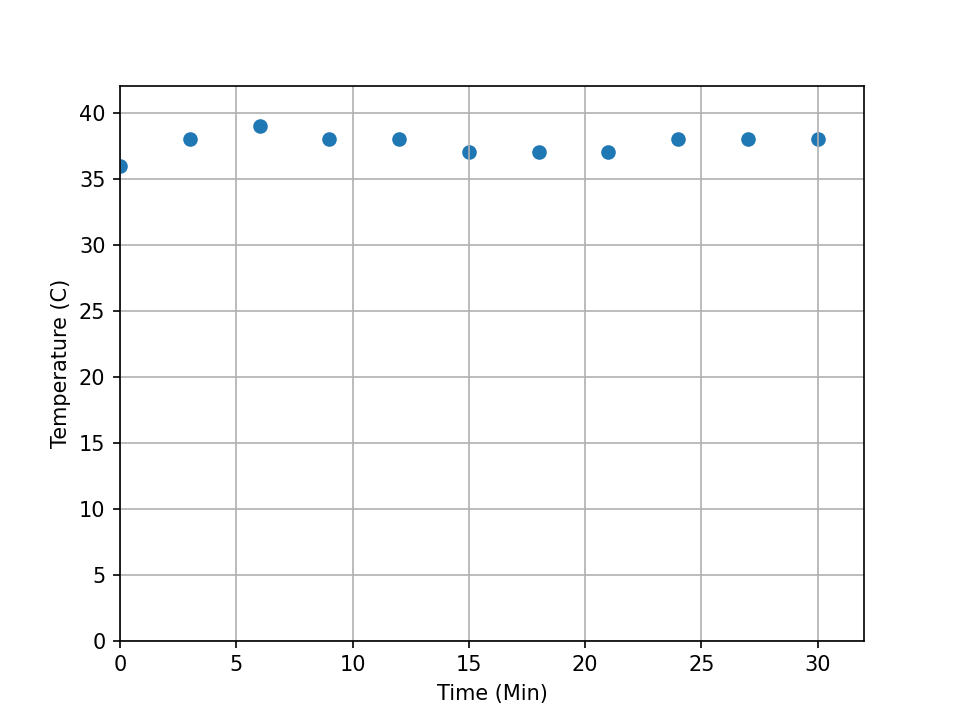

Text(0, 0.5, 'Temperature (C)')

In [13]:
# Make a scatterplot of the Time vs Temperature Output data Short term rapid Trial 1

plt.figure()
plt.grid(True)
    #will give you a scatterplot
plt.scatter(o.Time, o.Temperature)
plt.axis([0, 32, 0, 42])
plt.xlabel("Time (Min)")
plt.ylabel("Temperature (C)")

In [14]:
# Inputting the short term data in a spreadsheet
p = pd.DataFrame({('Time'):[0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99],
                  ('Temperature'): [38,39,40,40,39,39,38,38,37,37,38,37,38,38,39,40,40,39,38,39,38,37,38,37,38,37,38,39,40,40,38,37,38,37]})
p

,Time,Temperature
0,0,38
1,3,39
2,6,40
3,9,40
4,12,39
5,15,39
6,18,38
7,21,38
8,24,37
9,27,37


<IPython.core.display.Javascript object>


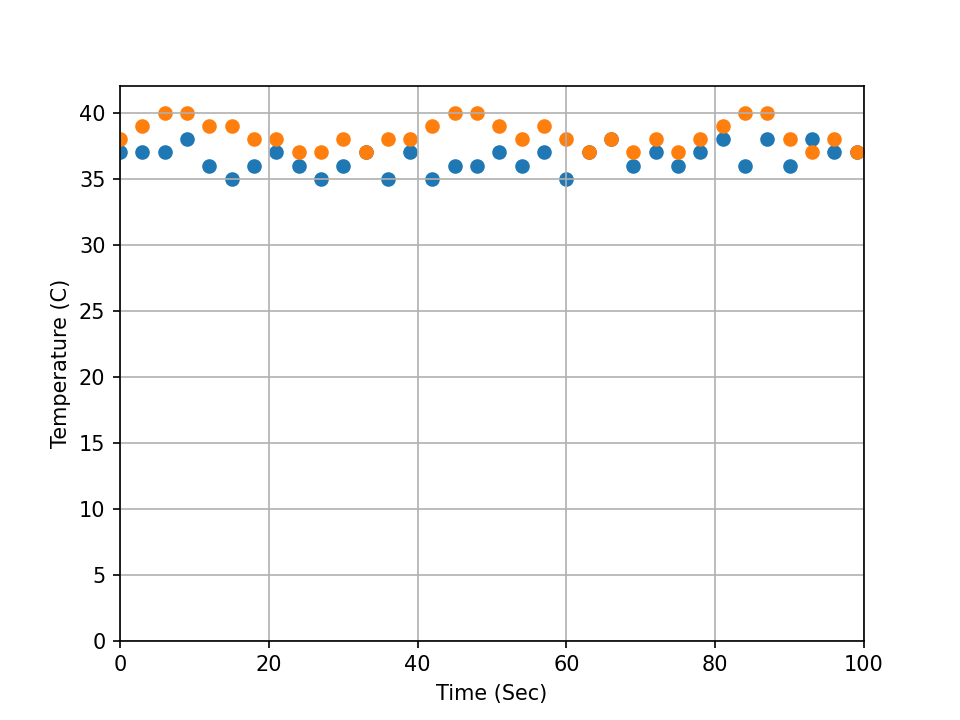

Text(0, 0.5, 'Temperature (C)')

In [15]:
# Make a scatterplot of the Time vs Temperature Output data Short term rapid Trial 1

plt.figure()
plt.grid(True)
    #will give you a scatterplot
plt.scatter(m.Time, m.Temperature) #scatterplot for data outside of magnetic field
plt.scatter(p.Time, p.Temperature) #scatterplot for data inside of magnetic field
plt.axis([0, 100, 0, 42])
plt.xlabel("Time (Sec)")
plt.ylabel("Temperature (C)")